In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the CSV file
file_path = 'customer_purchase_data 2.csv'
data = pd.read_csv(file_path)

# Check for missing values and handle them (if any)
data = data.dropna()

# Encode categorical variables (if any)
# In this dataset, 'Gender' seems to be the only categorical variable that might need encoding
# Assuming 'Gender' is 0 for Female and 1 for Male, no encoding is required

# Feature scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data.drop('PurchaseStatus', axis=1))

# Split the dataset into training and testing sets
X = scaled_features
y = data['PurchaseStatus']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.show()

def print_classification_report(y_true, y_pred):
    print(classification_report(y_true, y_pred))


Linear Regression
Mean Squared Error: 0.17333333333333334
              precision    recall  f1-score   support

           0       0.81      0.92      0.86       172
           1       0.87      0.71      0.78       128

    accuracy                           0.83       300
   macro avg       0.84      0.81      0.82       300
weighted avg       0.83      0.83      0.83       300



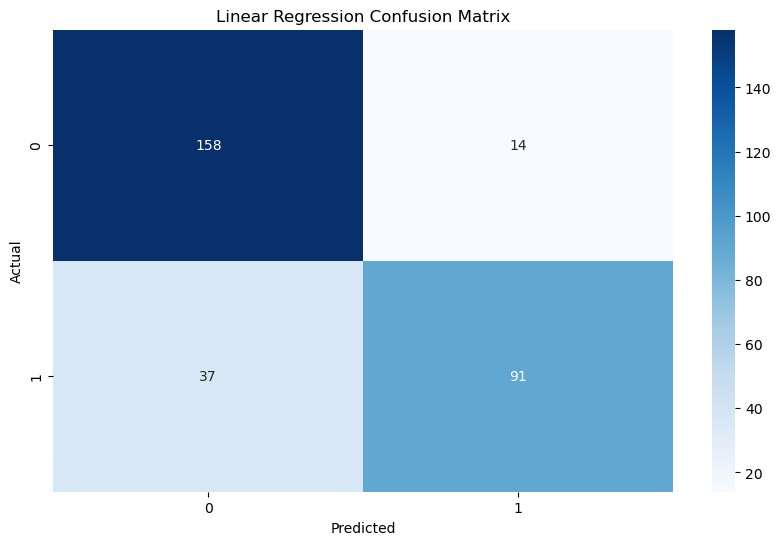

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# Predictions and evaluation
y_pred_lr = linear_reg.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr.round())
y_pred_lr_class = (y_pred_lr > 0.5).astype(int)

print("Linear Regression")
print(f"Mean Squared Error: {mse_lr}")
print_classification_report(y_test, y_pred_lr_class)
plot_confusion_matrix(y_test, y_pred_lr_class, 'Linear Regression Confusion Matrix')

Logistic Regression
Accuracy: 0.8366666666666667
              precision    recall  f1-score   support

           0       0.82      0.92      0.87       172
           1       0.88      0.72      0.79       128

    accuracy                           0.84       300
   macro avg       0.85      0.82      0.83       300
weighted avg       0.84      0.84      0.83       300



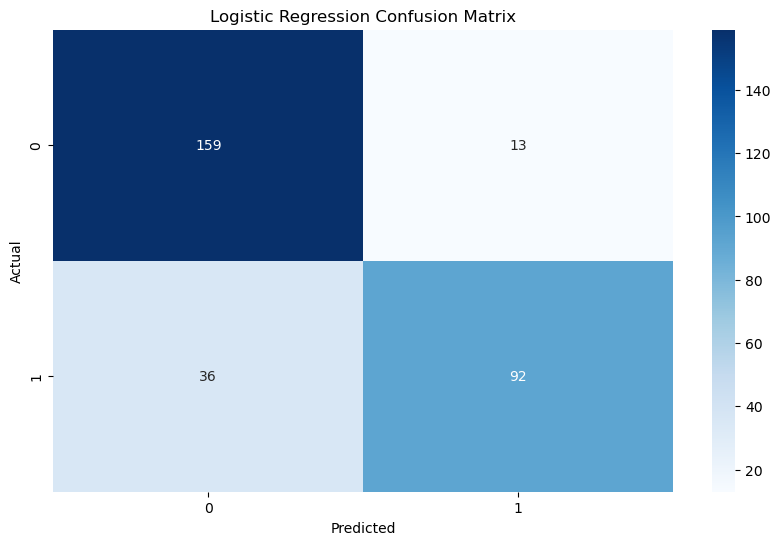

In [34]:
from sklearn.linear_model import LogisticRegression

# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Predictions and evaluation
y_pred_log = log_reg.predict(X_test)
accuracy_log = accuracy_score(y_test, y_pred_log)

print("Logistic Regression")
print(f"Accuracy: {accuracy_log}")
print_classification_report(y_test, y_pred_log)
plot_confusion_matrix(y_test, y_pred_log, 'Logistic Regression Confusion Matrix')


Support Vector Machine
Accuracy: 0.87
              precision    recall  f1-score   support

           0       0.86      0.92      0.89       172
           1       0.89      0.80      0.84       128

    accuracy                           0.87       300
   macro avg       0.87      0.86      0.87       300
weighted avg       0.87      0.87      0.87       300



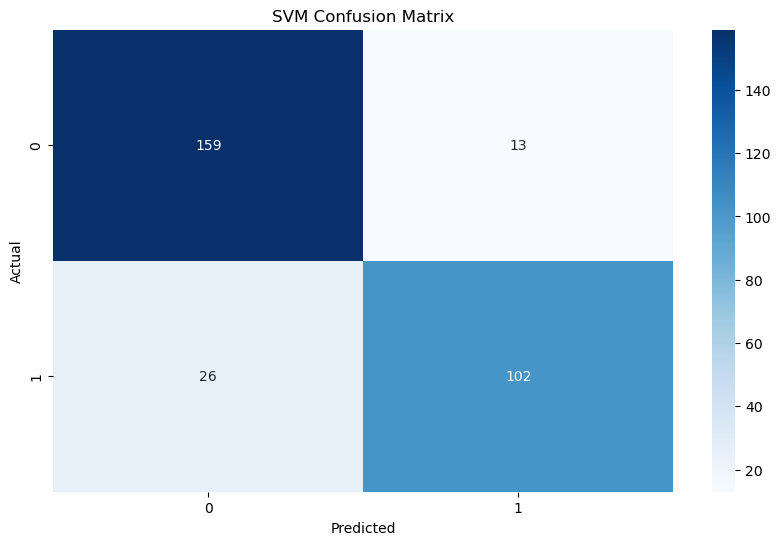

In [35]:
from sklearn.svm import SVC

# Support Vector Machine
svm = SVC()
svm.fit(X_train, y_train)

# Predictions and evaluation
y_pred_svm = svm.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)

print("Support Vector Machine")
print(f"Accuracy: {accuracy_svm}")
print_classification_report(y_test, y_pred_svm)
plot_confusion_matrix(y_test, y_pred_svm, 'SVM Confusion Matrix')


Decision Tree
Accuracy: 0.9
              precision    recall  f1-score   support

           0       0.89      0.95      0.92       172
           1       0.92      0.84      0.88       128

    accuracy                           0.90       300
   macro avg       0.90      0.89      0.90       300
weighted avg       0.90      0.90      0.90       300



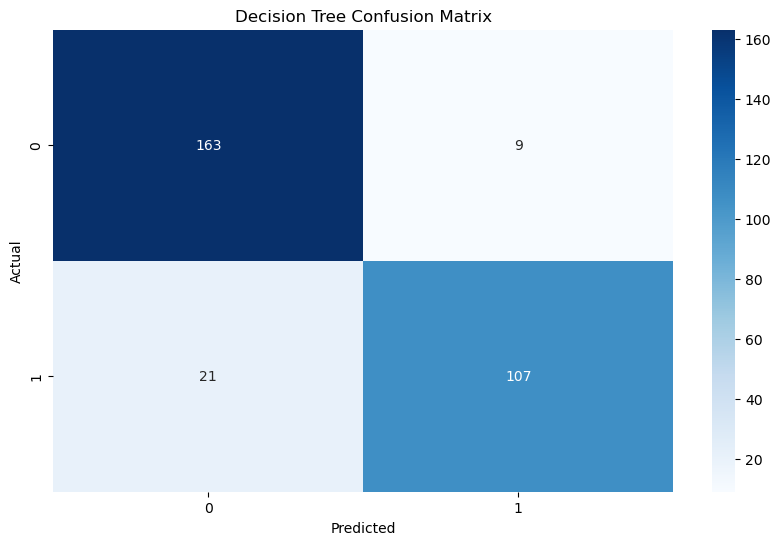

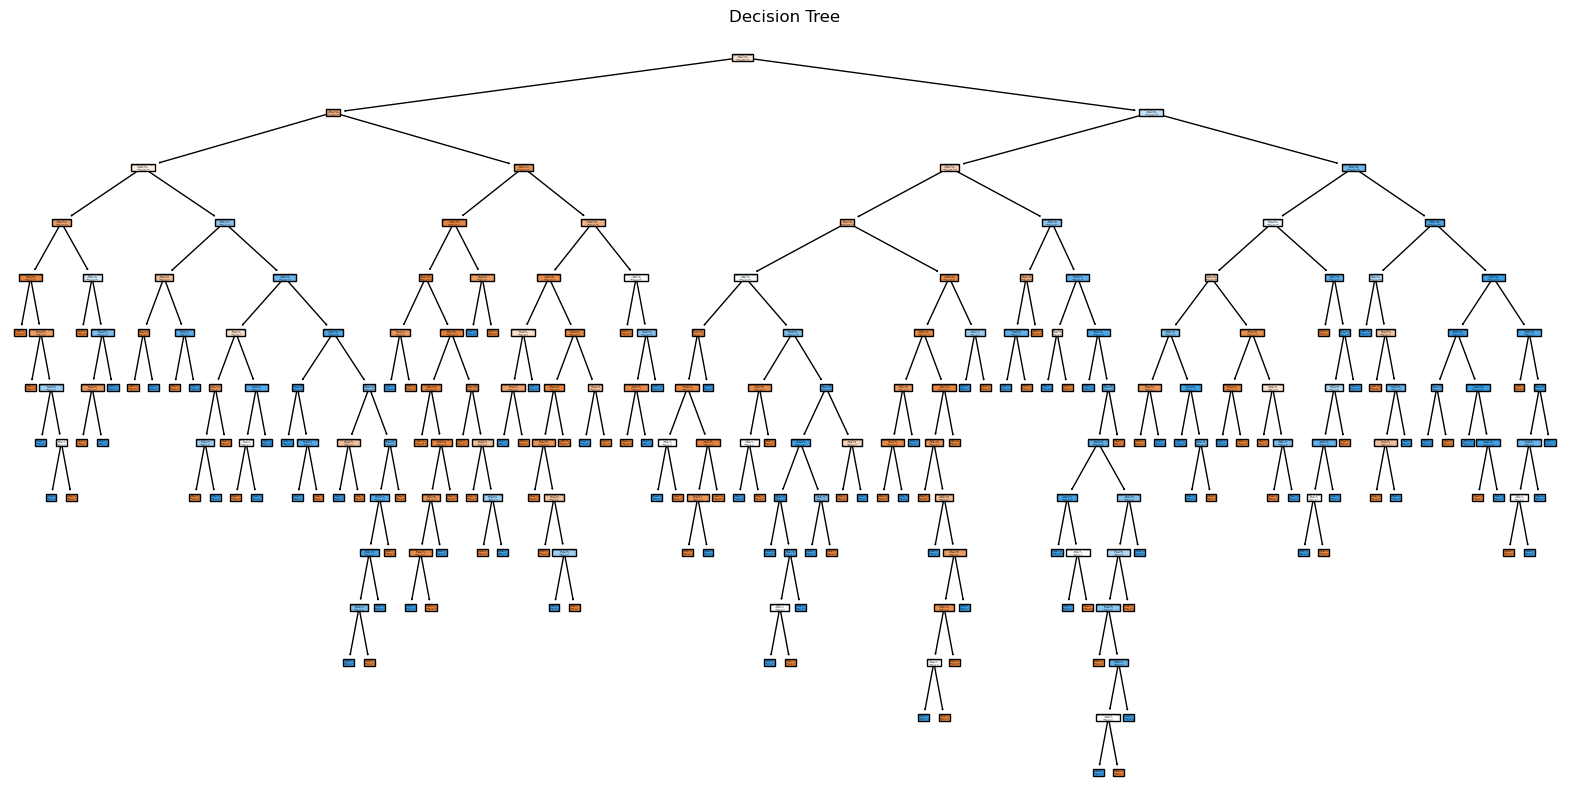

In [36]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

# Predictions and evaluation
y_pred_dt = dt.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)

print("Decision Tree")
print(f"Accuracy: {accuracy_dt}")
print_classification_report(y_test, y_pred_dt)
plot_confusion_matrix(y_test, y_pred_dt, 'Decision Tree Confusion Matrix')

# Plot the tree
plt.figure(figsize=(20, 10))
plot_tree(dt, filled=True, feature_names=data.drop('PurchaseStatus', axis=1).columns, class_names=['0', '1'])
plt.title('Decision Tree')
plt.show()


Random Forest
Accuracy: 0.95
              precision    recall  f1-score   support

           0       0.92      0.99      0.96       172
           1       0.99      0.89      0.94       128

    accuracy                           0.95       300
   macro avg       0.96      0.94      0.95       300
weighted avg       0.95      0.95      0.95       300



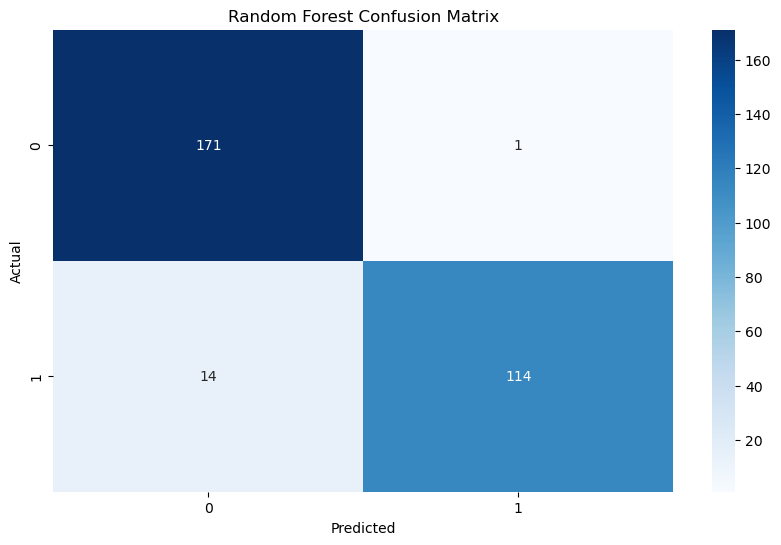

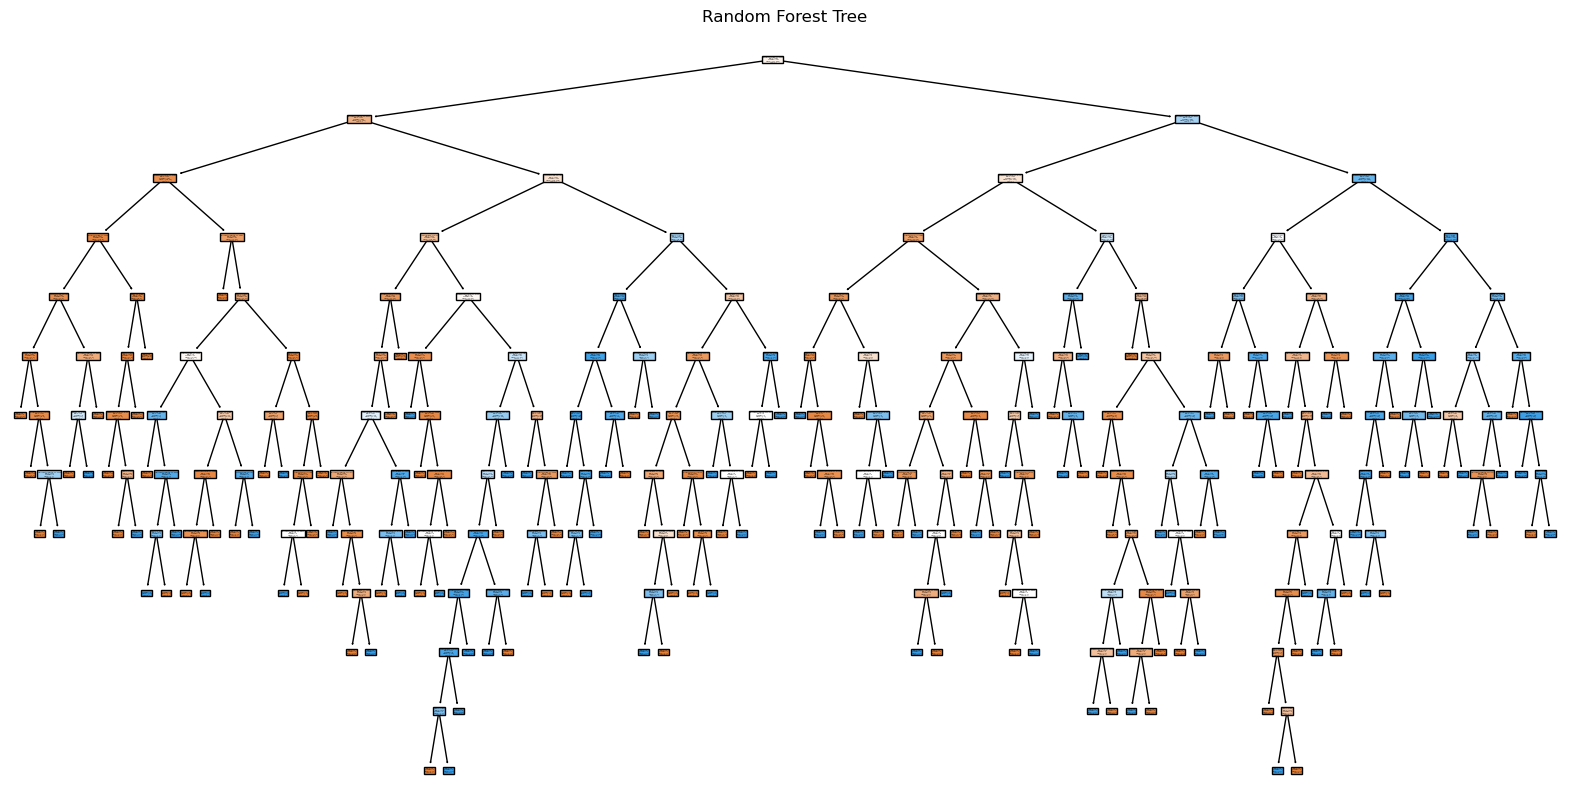

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree

# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Predictions and evaluation
y_pred_rf = rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

print("Random Forest")
print(f"Accuracy: {accuracy_rf}")
print_classification_report(y_test, y_pred_rf)
plot_confusion_matrix(y_test, y_pred_rf, 'Random Forest Confusion Matrix')

# Plot one of the trees in the forest
plt.figure(figsize=(20, 10))
plot_tree(rf.estimators_[0], filled=True, feature_names=data.drop('PurchaseStatus', axis=1).columns, class_names=['0', '1'])
plt.title('Random Forest Tree')
plt.show()


Naive Bayes
Accuracy: 0.8366666666666667
              precision    recall  f1-score   support

           0       0.81      0.93      0.87       172
           1       0.88      0.71      0.79       128

    accuracy                           0.84       300
   macro avg       0.85      0.82      0.83       300
weighted avg       0.84      0.84      0.83       300



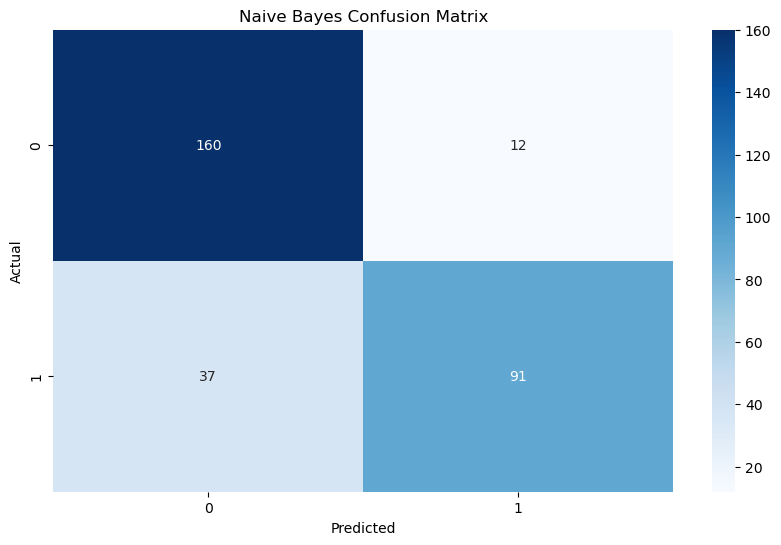

In [38]:
from sklearn.naive_bayes import GaussianNB

# Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)

# Predictions and evaluation
y_pred_nb = nb.predict(X_test)
accuracy_nb = accuracy_score(y_test, y_pred_nb)

print("Naive Bayes")
print(f"Accuracy: {accuracy_nb}")
print_classification_report(y_test, y_pred_nb)
plot_confusion_matrix(y_test, y_pred_nb, 'Naive Bayes Confusion Matrix')


k-Nearest Neighbors
Accuracy: 0.8333333333333334


              precision    recall  f1-score   support

           0       0.82      0.91      0.86       172
           1       0.85      0.73      0.79       128

    accuracy                           0.83       300
   macro avg       0.84      0.82      0.83       300
weighted avg       0.84      0.83      0.83       300



c:\Users\hshre\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


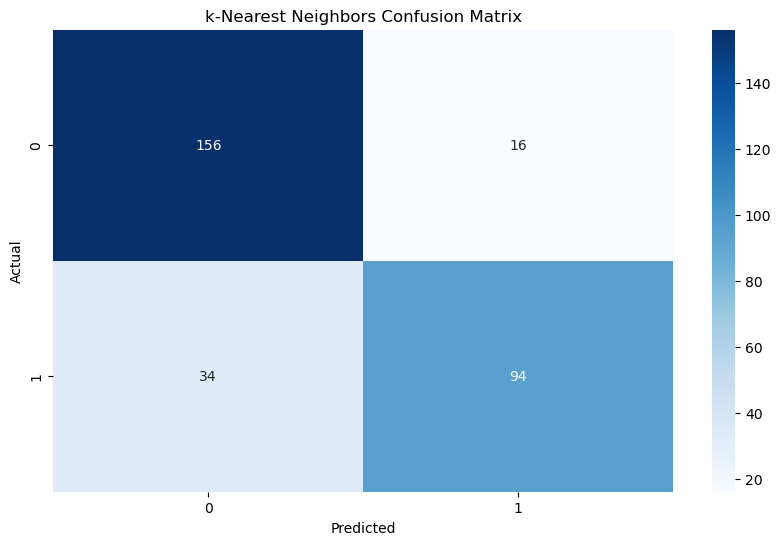

In [39]:
from sklearn.neighbors import KNeighborsClassifier

# k-Nearest Neighbors
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# Predictions and evaluation
y_pred_knn = knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)

print("k-Nearest Neighbors")
print(f"Accuracy: {accuracy_knn}")
print_classification_report(y_test, y_pred_knn)
plot_confusion_matrix(y_test, y_pred_knn, 'k-Nearest Neighbors Confusion Matrix')


In [40]:
# Print the evaluation metrics for all models
print(f"Linear Regression MSE: {mse_lr}")
print(f"Logistic Regression Accuracy: {accuracy_log}")
print(f"SVM Accuracy: {accuracy_svm}")
print(f"Decision Tree Accuracy: {accuracy_dt}")
print(f"Random Forest Accuracy: {accuracy_rf}")
print(f"Naive Bayes Accuracy: {accuracy_nb}")
print(f"k-Nearest Neighbors Accuracy: {accuracy_knn}")


Linear Regression MSE: 0.17333333333333334
Logistic Regression Accuracy: 0.8366666666666667
SVM Accuracy: 0.87
Decision Tree Accuracy: 0.9
Random Forest Accuracy: 0.95
Naive Bayes Accuracy: 0.8366666666666667
k-Nearest Neighbors Accuracy: 0.8333333333333334
